# Part 2

## Cleanning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
import re
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime
import re
import warnings
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

In [2]:
expidiaDf = pd.read_csv('expidia3TS.csv')

## let's see The Data we got

In [3]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   element                        54384 non-null  object 
 1   hotel url                      53054 non-null  object 
 2   name                           53054 non-null  object 
 3   price                          53032 non-null  object 
 4   Breakfast include              9786 non-null   object 
 5   full refund                    28623 non-null  object 
 6   reserve now pay later          52223 non-null  object 
 7   rate out of 10                 51692 non-null  float64
 8   properties left at this price  22159 non-null  object 
 9   number of reviews              51692 non-null  object 
 10  check_in                       54384 non-null  object 
 11  check_out                      54384 non-null  object 
 12  TTT                            54384 non-null 

#### We don't need the Name, Element ID, Hotel url to explore the data

In [4]:
expidiaDf = expidiaDf.drop(["element", 'hotel url'], axis = 1)
expidiaDf.describe().T

,count,mean,std,min,25%,50%,75%,max
rate out of 10,51692.0,8.378457,0.770904,3.2,8.0,8.4,8.8,10.0
time_stamp,54384.0,1.771348,0.828306,1.0,1.0,2.0,3.0,3.0


### we need to get more numeric values so lets see what we can change to see them

### Price

In [5]:
expidiaDf['price']

0          $219 total
1          $219 total
2          $291 total
3          $291 total
4          $174 total
             ...     
54379    $2,115 total
54380    $2,064 total
54381    $1,850 total
54382    $1,459 total
54383    $1,642 total
Name: price, Length: 54384, dtype: object

In [6]:
expidiaDf['price'] = expidiaDf["price"].str.replace('total','').str.replace('$','').str.replace(',','').fillna(0).astype(int)
expidiaDf['price'].describe()

count    54384.000000
mean      1003.386088
std        699.742837
min          0.000000
25%        500.000000
50%        897.500000
75%       1373.000000
max      24492.000000
Name: price, dtype: float64

#### Refund

In [7]:
expidiaDf['full refund'] = expidiaDf.apply(lambda x: 1 if 'Fully refundable' in x.values else 0, axis=1)
expidiaDf['full refund'] = expidiaDf['full refund'].fillna(0).astype(int)
expidiaDf['full refund'].describe()

count    54384.000000
mean         0.479902
std          0.499601
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: full refund, dtype: float64

#### Rating of the Hotel

In [8]:
expidiaDf['rate out of 10'] = expidiaDf['rate out of 10'].fillna(0).astype(float)
expidiaDf['rate out of 10'].describe()

count    54384.000000
mean         7.963725
std          1.966660
min          0.000000
25%          8.000000
50%          8.400000
75%          8.800000
max         10.000000
Name: rate out of 10, dtype: float64

#### Reserve now pay later

In [9]:
expidiaDf['reserve now pay later'] = expidiaDf['reserve now pay later'].str.replace('\n','').str.replace('8.6','').str.replace('/','').str.replace('10','').str.replace('()','').str.replace(',','').str.replace('Fully refundable','')
expidiaDf['reserve now pay later'] = expidiaDf.apply(lambda x: 1 if 'Reserve now pay later' in x.values else 0, axis=1)
expidiaDf['reserve now pay later'] = expidiaDf['reserve now pay later'].astype(int).fillna(0)
expidiaDf['reserve now pay later'].describe()

count    54384.000000
mean         0.434907
std          0.495749
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: reserve now pay later, dtype: float64

#### Breackfast included

In [10]:
expidiaDf['Breakfast include'] = expidiaDf.apply(lambda x: 1 if 'Breakfast included' in x.values else 0, axis=1)
expidiaDf['Breakfast include'] = expidiaDf['Breakfast include'].astype(int).fillna(0)
expidiaDf['Breakfast include'].describe()

count    54384.000000
mean         0.091773
std          0.288708
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Breakfast include, dtype: float64

#### How many people reviewed the hotel

In [11]:
expidiaDf['number of reviews'] = expidiaDf['number of reviews'].str.extract(r'\((.*?)\)')
expidiaDf['number of reviews'] = expidiaDf['number of reviews'].str.replace(',','').str.replace("review",'').str.replace("s",'').fillna(0).astype(int)
expidiaDf['number of reviews'].describe()

count    54384.000000
mean      1027.186323
std        730.048472
min          0.000000
25%        760.000000
50%       1005.000000
75%       1163.000000
max       6102.000000
Name: number of reviews, dtype: float64

#### if there are any spacial offers on the hotel w can know that the website is working with this hotel, so we will check how many properties lleft at a specific price

In [12]:
expidiaDf['properties left at this price'] = expidiaDf['properties left at this price'].fillna('').apply(lambda x: 1 if x != '' else 0)
expidiaDf['properties left at this price'] = expidiaDf['properties left at this price'].astype(int).fillna(0)
expidiaDf['properties left at this price']

0        1
1        1
2        0
3        0
4        0
        ..
54379    0
54380    0
54381    0
54382    1
54383    0
Name: properties left at this price, Length: 54384, dtype: int64

#### we would like to work on these dates, so we can know what are the TTT and LOS

In [13]:
expidiaDf['check_out'] = pd.to_datetime(expidiaDf['check_out'])
expidiaDf['check_in'] = pd.to_datetime(expidiaDf['check_in'])

#### Calcultate the TTT and LOS

In [14]:
date = pd.to_datetime("2023-03-05")
expidiaDf['TTT'] = expidiaDf['check_in'] - date
expidiaDf['LOS'] = expidiaDf['check_out'] - expidiaDf['check_in'] + np.timedelta64(1, 'D')
expidiaDf['TTT'] = expidiaDf['TTT'].astype(int)
expidiaDf['TTT'] = expidiaDf['TTT'] / 86400000000000
expidiaDf['TTT'] = expidiaDf['TTT'].astype(int).fillna(0)
expidiaDf['LOS'] = expidiaDf['LOS'].astype(int)
expidiaDf['LOS'] = expidiaDf['LOS'] / 86400000000000
expidiaDf['LOS'] = expidiaDf['LOS'].astype(int).fillna(0)

In [15]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           53054 non-null  object        
 1   price                          54384 non-null  int64         
 2   Breakfast include              54384 non-null  int64         
 3   full refund                    54384 non-null  int64         
 4   reserve now pay later          54384 non-null  int64         
 5   rate out of 10                 54384 non-null  float64       
 6   properties left at this price  54384 non-null  int64         
 7   number of reviews              54384 non-null  int64         
 8   check_in                       54384 non-null  datetime64[ns]
 9   check_out                      54384 non-null  datetime64[ns]
 10  TTT                            54384 non-null  int64         
 11  LOS            

#### Now after we finished to calculate the TTT and LOS we can remove the check in and check out

In [16]:
expidiaDf.describe().T

,count,mean,std,min,25%,50%,75%,max
price,54384.0,1003.386088,699.742837,0.0,500.0,897.5,1373.0,24492.0
Breakfast include,54384.0,0.091773,0.288708,0.0,0.0,0.0,0.0,1.0
full refund,54384.0,0.479902,0.499601,0.0,0.0,0.0,1.0,1.0
reserve now pay later,54384.0,0.434907,0.495749,0.0,0.0,0.0,1.0,1.0
rate out of 10,54384.0,7.963725,1.966660,0.0,8.0,8.4,8.8,10.0
properties left at this price,54384.0,0.407454,0.491365,0.0,0.0,0.0,1.0,1.0
number of reviews,54384.0,1027.186323,730.048472,0.0,760.0,1005.0,1163.0,6102.0
TTT,54384.0,24.784587,13.070881,0.0,15.0,24.0,35.0,49.0
LOS,54384.0,3.968667,1.404052,2.0,3.0,4.0,5.0,6.0
time_stamp,54384.0,1.771348,0.828306,1.0,1.0,2.0,3.0,3.0


In [17]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           53054 non-null  object        
 1   price                          54384 non-null  int64         
 2   Breakfast include              54384 non-null  int64         
 3   full refund                    54384 non-null  int64         
 4   reserve now pay later          54384 non-null  int64         
 5   rate out of 10                 54384 non-null  float64       
 6   properties left at this price  54384 non-null  int64         
 7   number of reviews              54384 non-null  int64         
 8   check_in                       54384 non-null  datetime64[ns]
 9   check_out                      54384 non-null  datetime64[ns]
 10  TTT                            54384 non-null  int64         
 11  LOS            

### Data looks good for now

## moving the data to a clean CSV file so we can work on a nice

In [18]:
expidiaDf.to_csv('expidiaCDFF.csv', index=False)

# Exploration + Data preprocessing:

In [19]:
expidiaDf = pd.read_csv('expidiaCDFF.csv')

## Quastion 1 - The distribution graph of the 'number of reviews'

Text(0.5, 1.0, 'number of reviews')

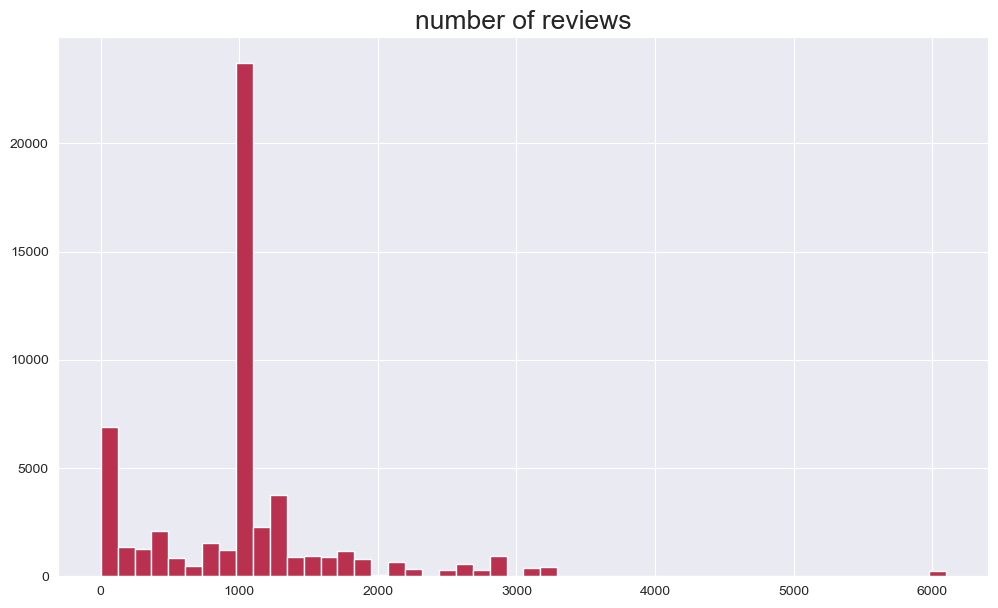

In [20]:
colors = ["#2B2D42", "#B9314F", "#8D99AE", "#F39237","#00F2F2","#57CC99","#FCFF4B","#FFE0B5","#6F732F"]
fig, (ax1) = plt.subplots( figsize = (15,5))
expidiaDf['number of reviews'].hist(bins=50,figsize=(12,7), color= colors[1], ax = ax1)
ax1.set_title("number of reviews", fontsize=19)

### We can see that we have a lot of hotels that have around 1000 reviews each. We can as assume that there may be a high correlation between the price and the number of comments but we will be able to see that better later in the heatMap graph


### Quastion 2 - The distribution graph of the 'rate out of 10'

Text(0, 0.5, 'Number of hotels that got the rate')

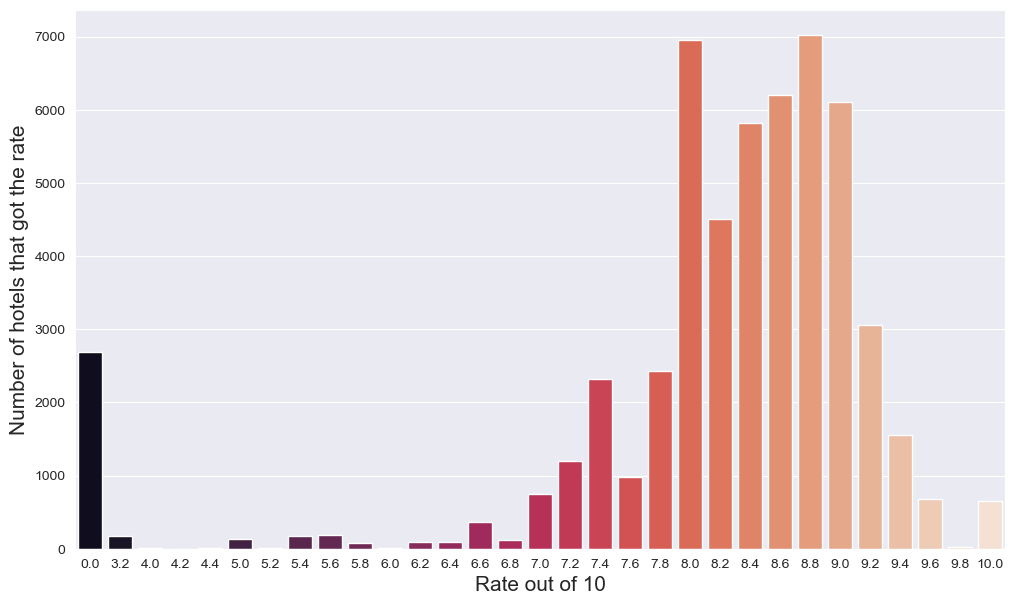

In [21]:
fig = plt.figure(figsize=(12, 7))
ax1.set_title("rate out of 1", fontsize=19)
ax = sns.countplot(x ="rate out of 10", data=expidiaDf,
                   order=expidiaDf["rate out of 10"].value_counts().sort_index(ascending=True).index, palette="rocket")
plt.xlabel("Rate out of 10", fontsize=15)
plt.ylabel("Number of hotels that got the rate", fontsize=15)

### We can see that we have a lot of hotels that have around 8 - 9 scores. We can also assume, base on common logic, that the higher the rating of the hotel, the better, and the higher the price will be

### Quastion 3 - The distribution graph of the 'price'

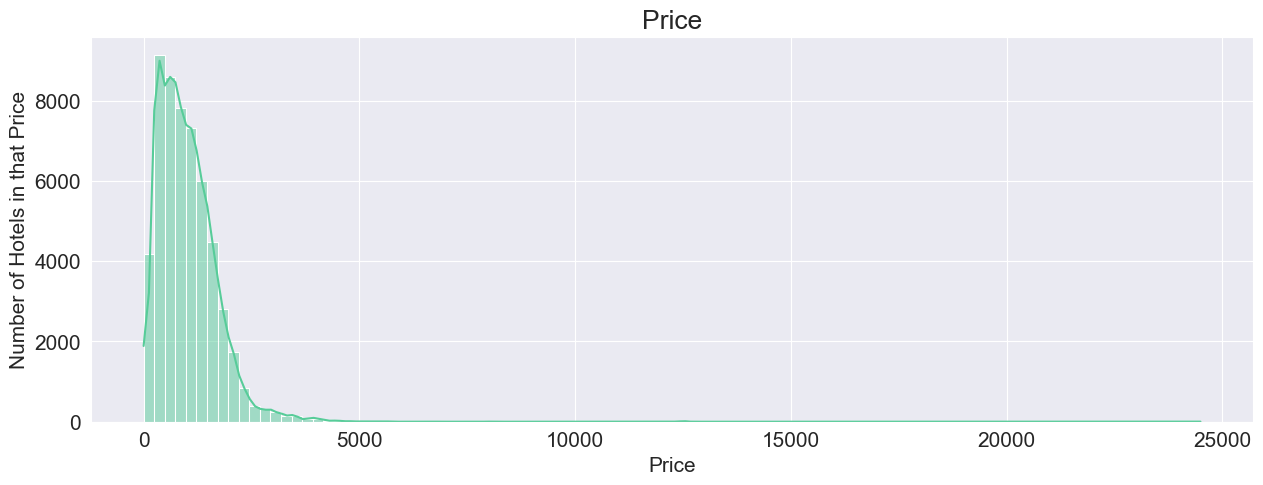

In [22]:
fig, (ax1) = plt.subplots(figsize = (15,5))
sns.histplot(x = expidiaDf['price'], bins=100, color= colors[5], ax = ax1, kde = True)
ax1.set_title("Price", fontsize=19)
ax1.set_xlabel("Price", fontsize=15)
ax1.set_ylabel("Number of Hotels in that Price", fontsize=15)
ax1.tick_params(labelsize=15)

### we can see that we didn't get a normal distribution, so we will need to fix that, that we can use the “Tucky” outlier to fix the data and help us get better results for our future

## tucky outlier

#### first lets see the Price in a boxplot

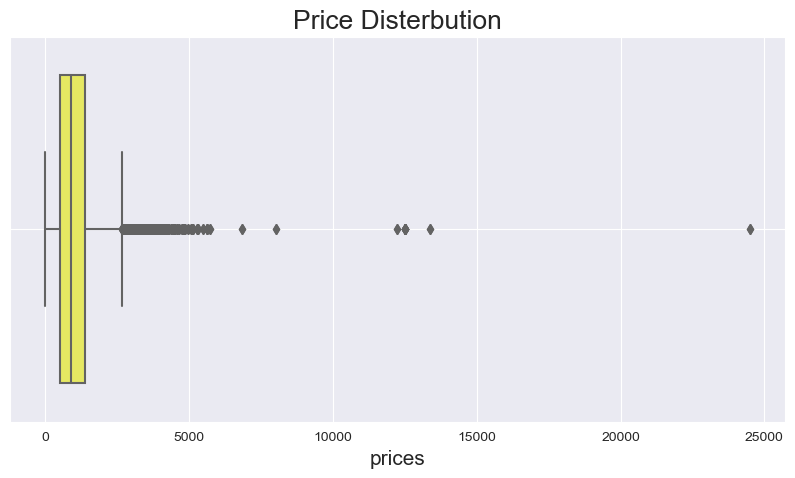

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.boxplot(x = "price", data = expidiaDf, ax=ax1, color= colors[6])
ax1.set_title("Price Disterbution", fontsize=19)
ax1.set_xlabel("prices", fontsize=15)
ax1.grid(True)

####  we can see that we have a lot of prices out of the box lets fix that with the Tucky process

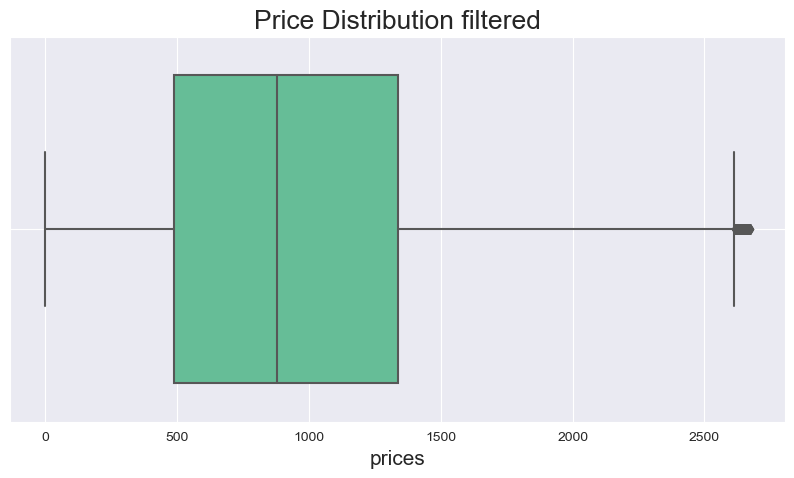

In [24]:
prices = expidiaDf['price']
priceQ1, priceQ3 = np.percentile(expidiaDf['price'],[25,75])
priceIQR = (priceQ3 - priceQ1)
priceTucky = priceQ3 + (1.5 * priceIQR)

filt_Price = prices.apply(lambda x:x> priceQ1-1.5*priceIQR and x<priceQ3 +1.5*priceIQR)
filtered_total_price = prices[filt_Price]

fig, ax1 = plt.subplots(figsize=(10, 5))
sns.boxplot(x=filtered_total_price, color=colors[5], ax=ax1)
ax1.set_title("Price Distribution filtered", fontsize=19)
ax1.set_xlabel("prices", fontsize=15)
ax1.grid(True)

### now lets see if there is ay change for each of the datasets

In [25]:
expidiaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54384 entries, 0 to 54383
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           53054 non-null  object 
 1   price                          54384 non-null  int64  
 2   Breakfast include              54384 non-null  int64  
 3   full refund                    54384 non-null  int64  
 4   reserve now pay later          54384 non-null  int64  
 5   rate out of 10                 54384 non-null  float64
 6   properties left at this price  54384 non-null  int64  
 7   number of reviews              54384 non-null  int64  
 8   check_in                       54384 non-null  object 
 9   check_out                      54384 non-null  object 
 10  TTT                            54384 non-null  int64  
 11  LOS                            54384 non-null  int64  
 12  time_stamp                     54384 non-null 

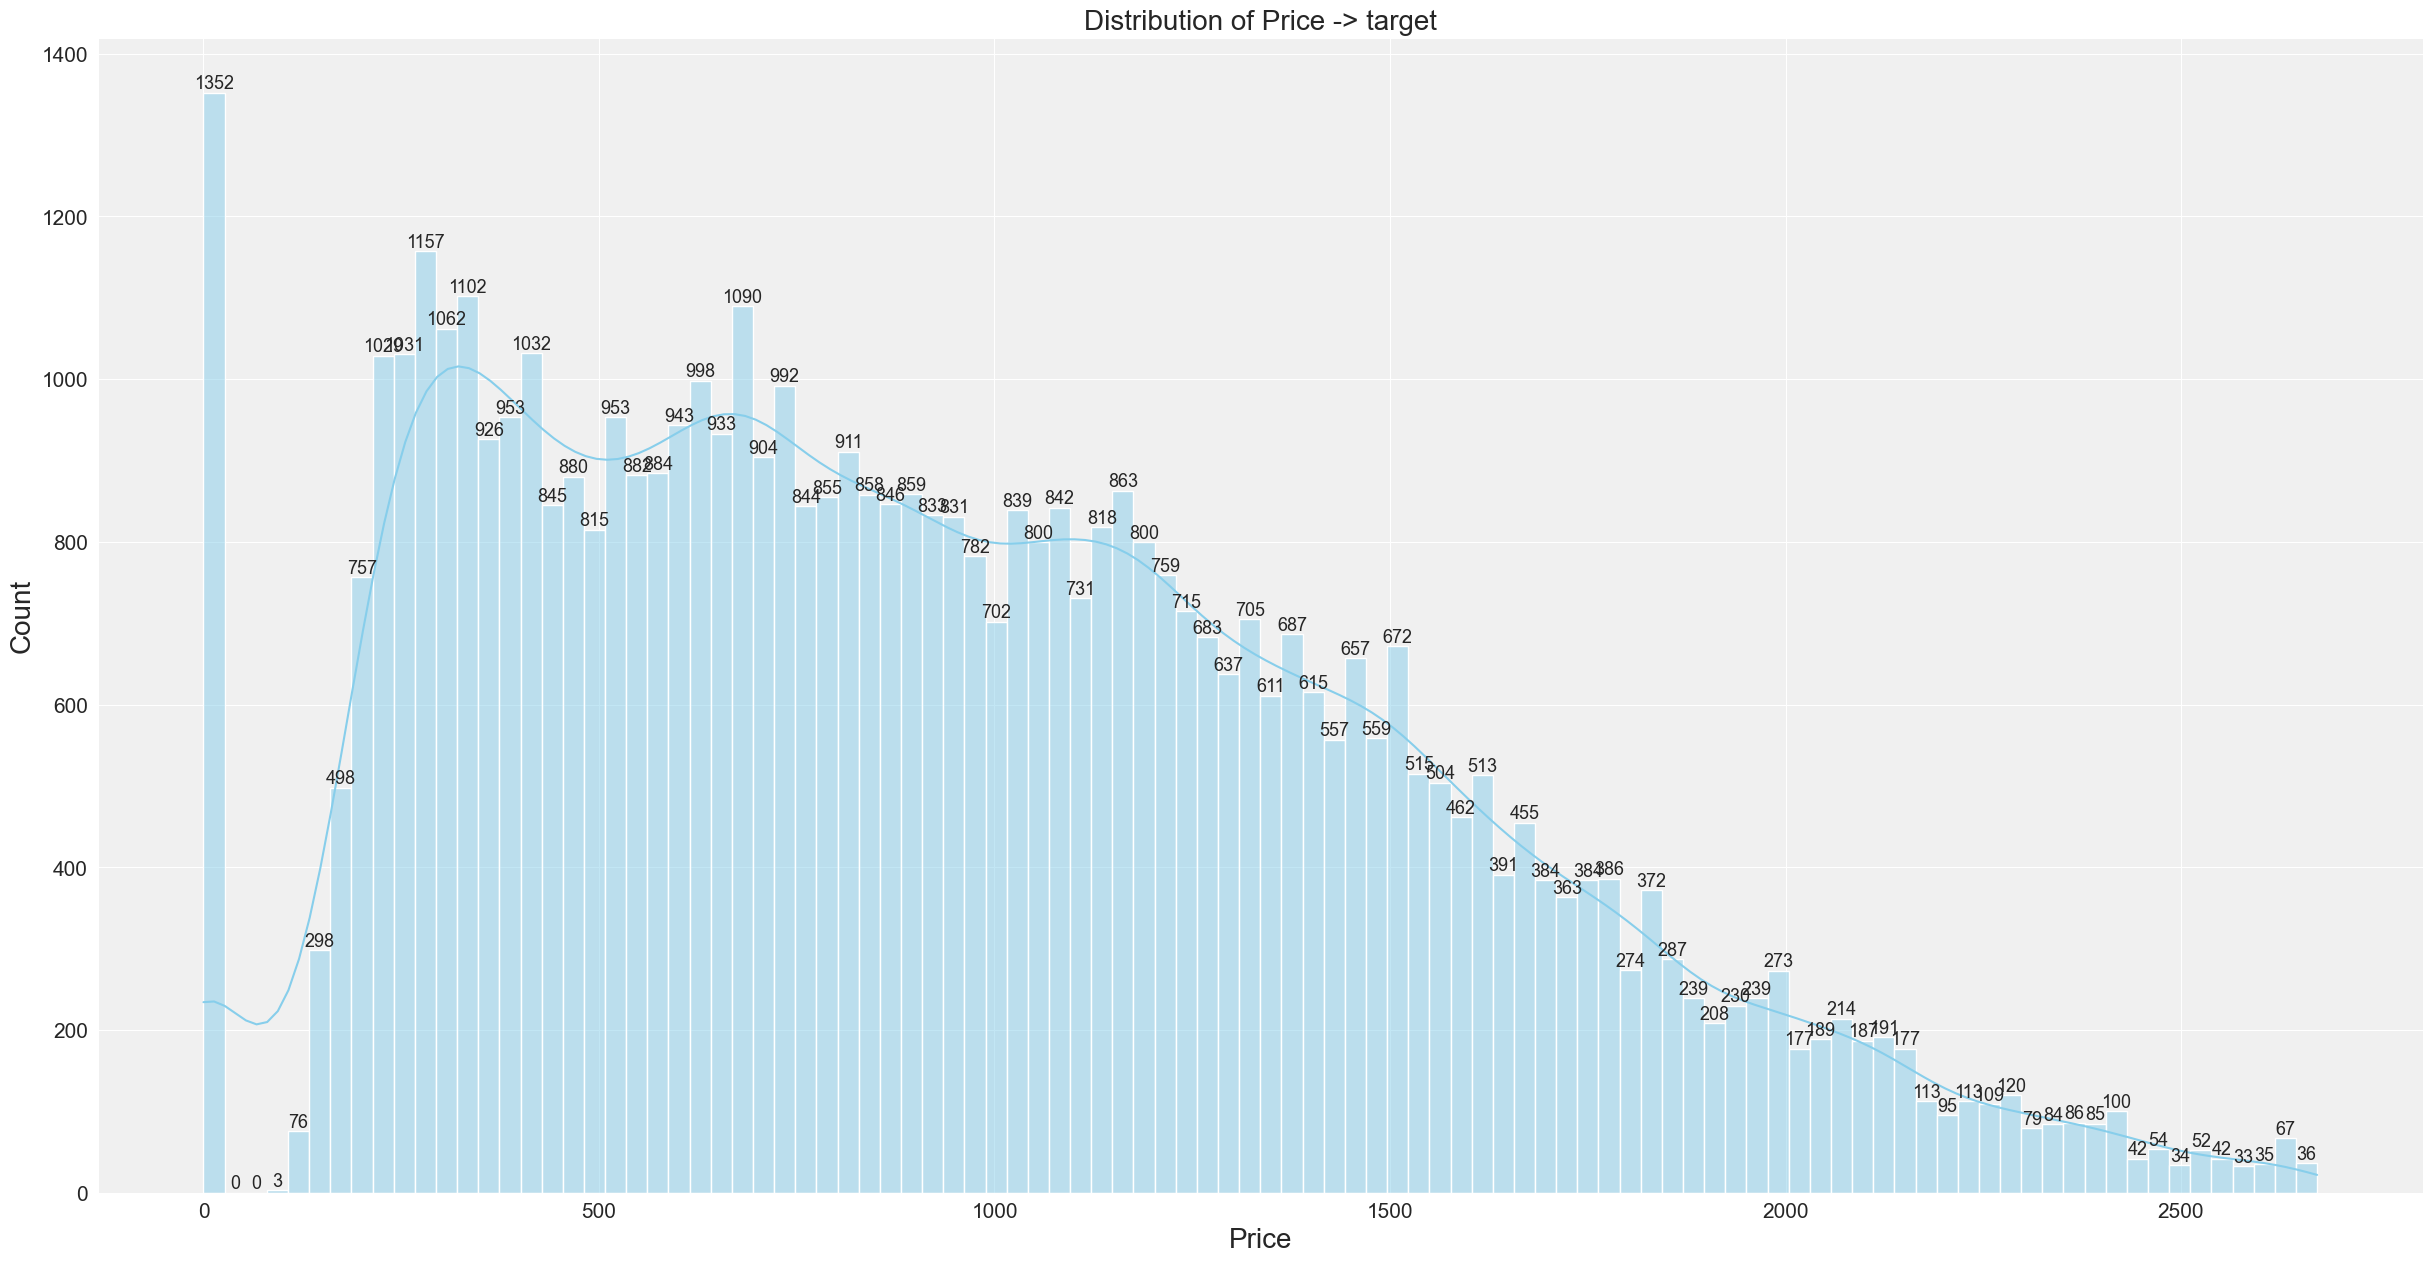

In [27]:
plt.figure(figsize=(30, 15))
ax = sns.histplot(x=filtered_total_price, data=expidiaDf, kde=True, bins=100, color='skyblue',alpha=0.5)
plt.title('Distribution of Price -> target', fontsize=20)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().set_axisbelow(True)
plt.gca().set_facecolor('#f0f0f0')
for rect in ax.patches:
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_height()
    label = f'{y_value:.0f}'
    ax.text(x_value, y_value, label, ha='center', va='bottom', fontsize=13)
plt.show()

### in this graph we can see the price range of all the hotels we got and how many hotels we have in each price range

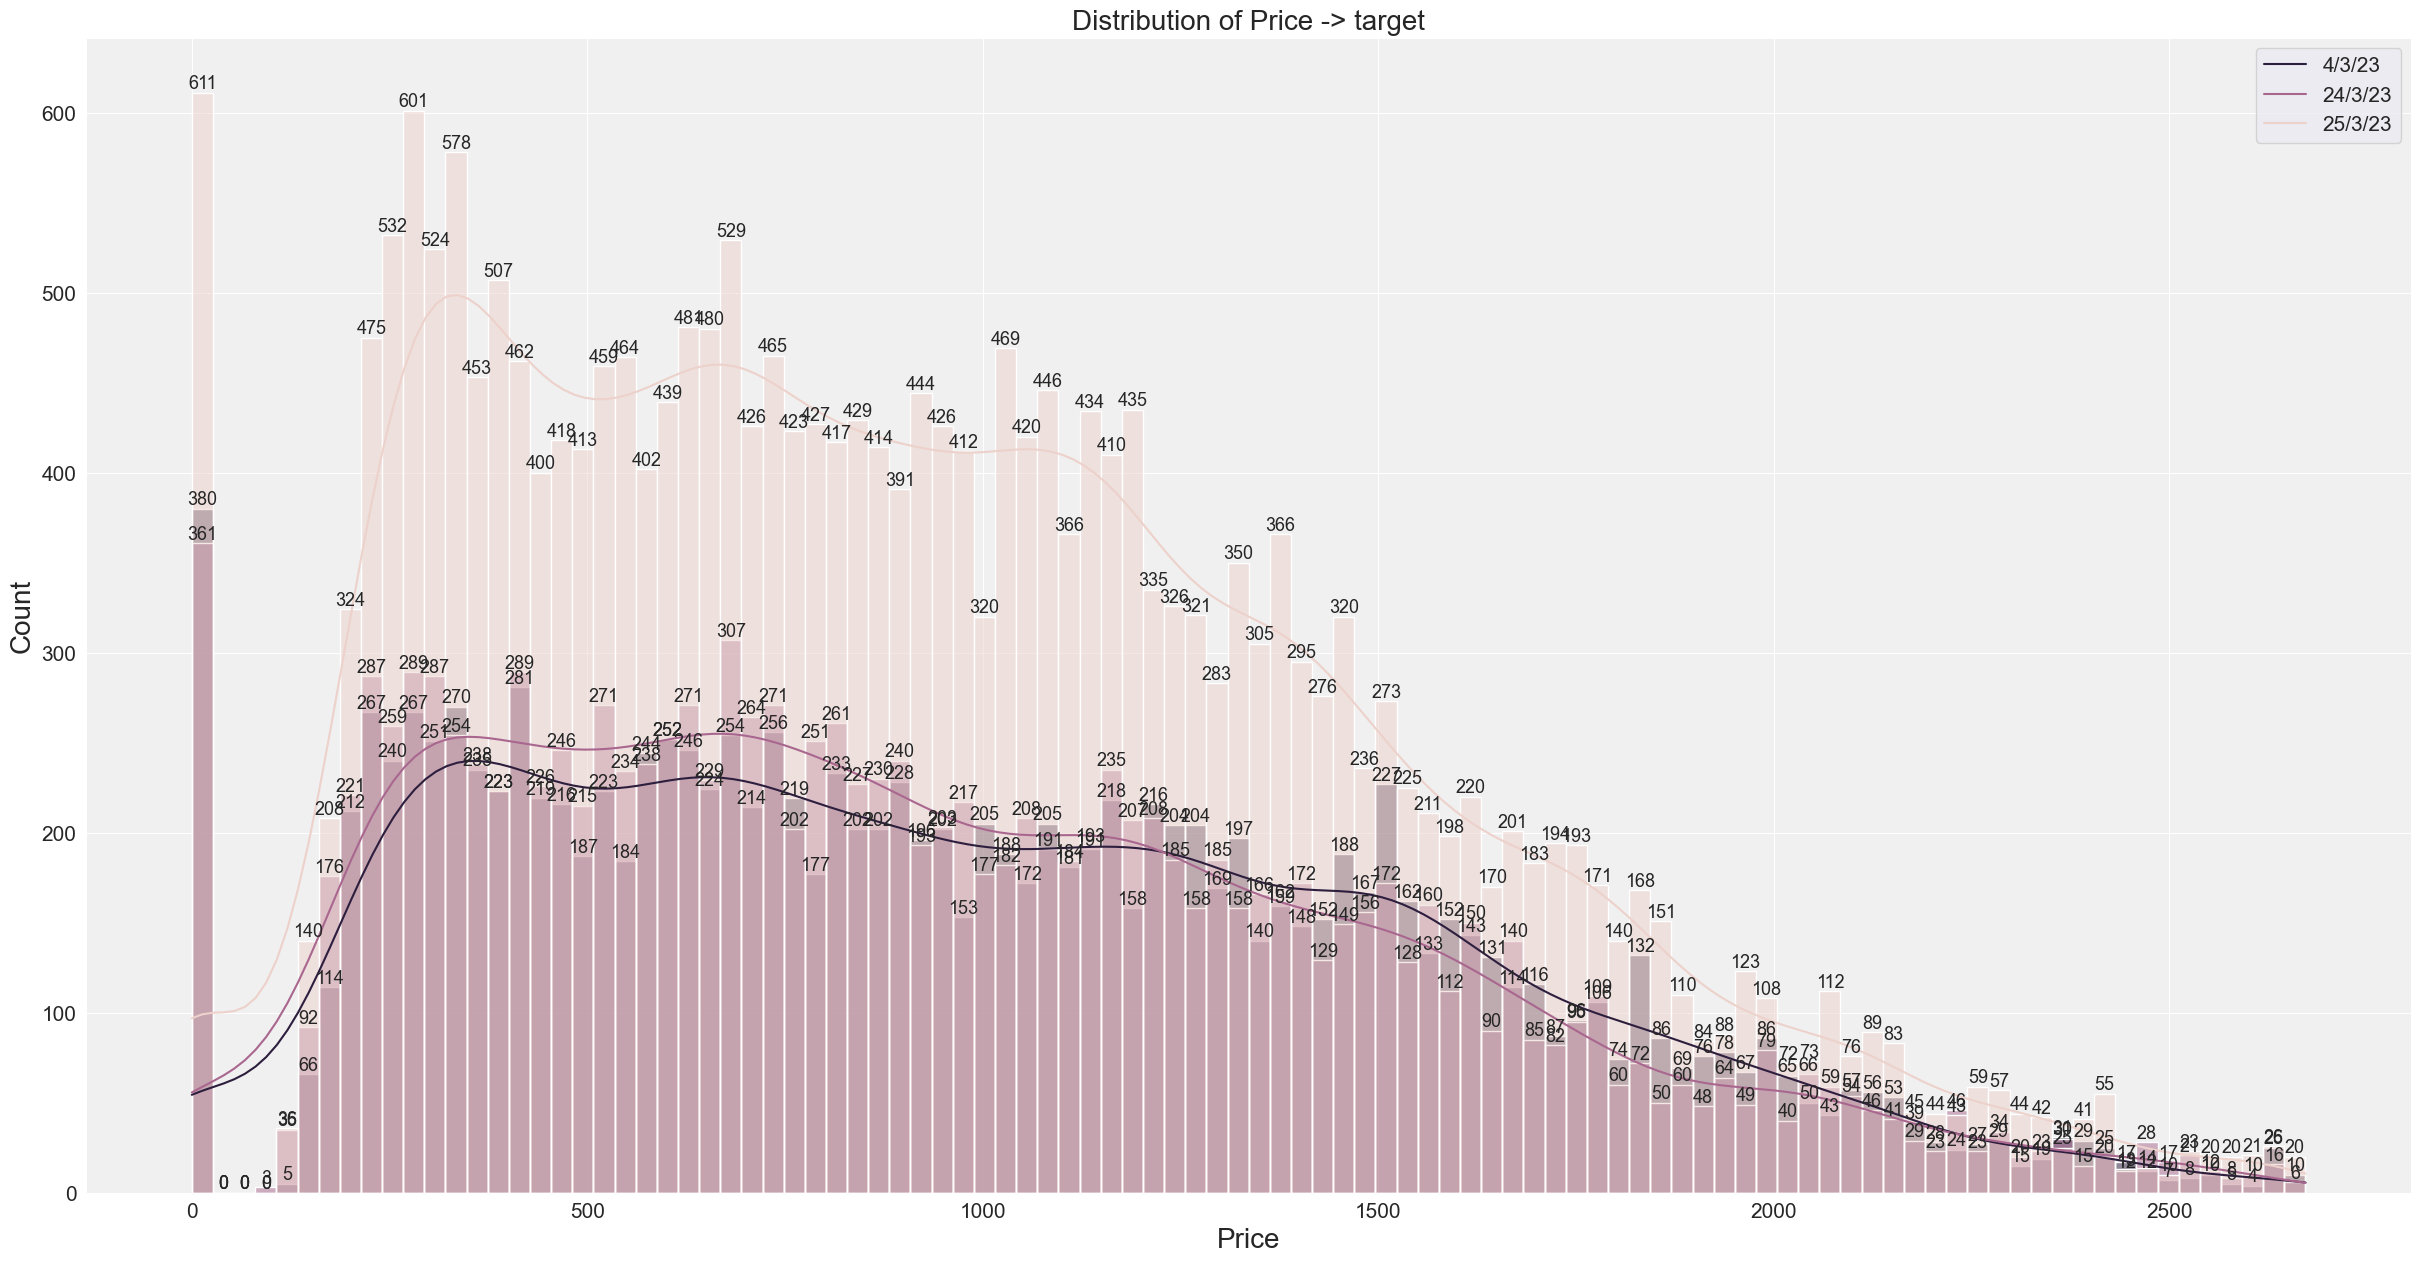

In [28]:
plt.figure(figsize=(30, 15))
ax = sns.histplot(x=filtered_total_price, data=expidiaDf,hue = 'time_stamp', kde=True, bins=100, color='skyblue',alpha=0.5)
plt.title('Distribution of Price -> target', fontsize=20)
plt.xlabel('Price', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.gca().set_axisbelow(True)
plt.gca().set_facecolor('#f0f0f0')
legend = ['4/3/23','24/3/23','25/3/23']
plt.legend(legend, fontsize=15)
for rect in ax.patches:
    x_value = rect.get_x() + rect.get_width() / 2
    y_value = rect.get_height()
    label = f'{y_value:.0f}'
    ax.text(x_value, y_value, label, ha='center', va='bottom', fontsize=13)
plt.show()

### Here, we can see a significant change in the data each day we get closer to the end of the month’ we assume that the price gap may be that significant because of a few reasons:
### As get closer to summer, and the prices are starting to go up in values’ NYC is known as a very cold place, and in summer, this location may be better for travel since we can look much further into the end of the month the prices

### beacouse we would like to predict with the best data avalabe we will use the filterd data that we got using the tucky methood and use that in order to predict the prices

In [29]:
expidiaDf['pricefiltered'] = prices[filt_Price]
expidiaDf['pricefiltered'] = expidiaDf['pricefiltered'].fillna(0).astype(int)

<AxesSubplot: >

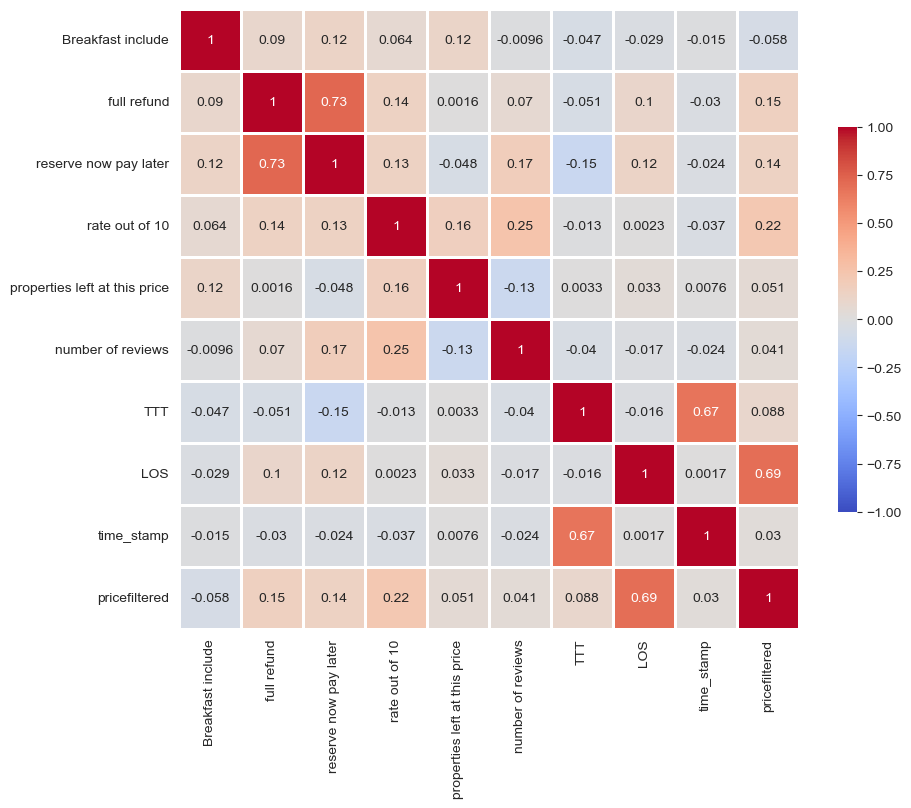

In [30]:
expidiaDF_filterdPrice = expidiaDf.drop(["price"], axis=1)
corr = expidiaDF_filterdPrice.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='coolwarm',vmin=-1, vmax=1, center=0,
            square=True, linewidths=-1, cbar_kws={"shrink": .5},annot=True, ax=ax)

### we can see that the values that help to predict the price are: "breakfast encluded", if there are any "propertyes left at this price", and "the number of reviews"

## now lets see how everything is being affected by each outher

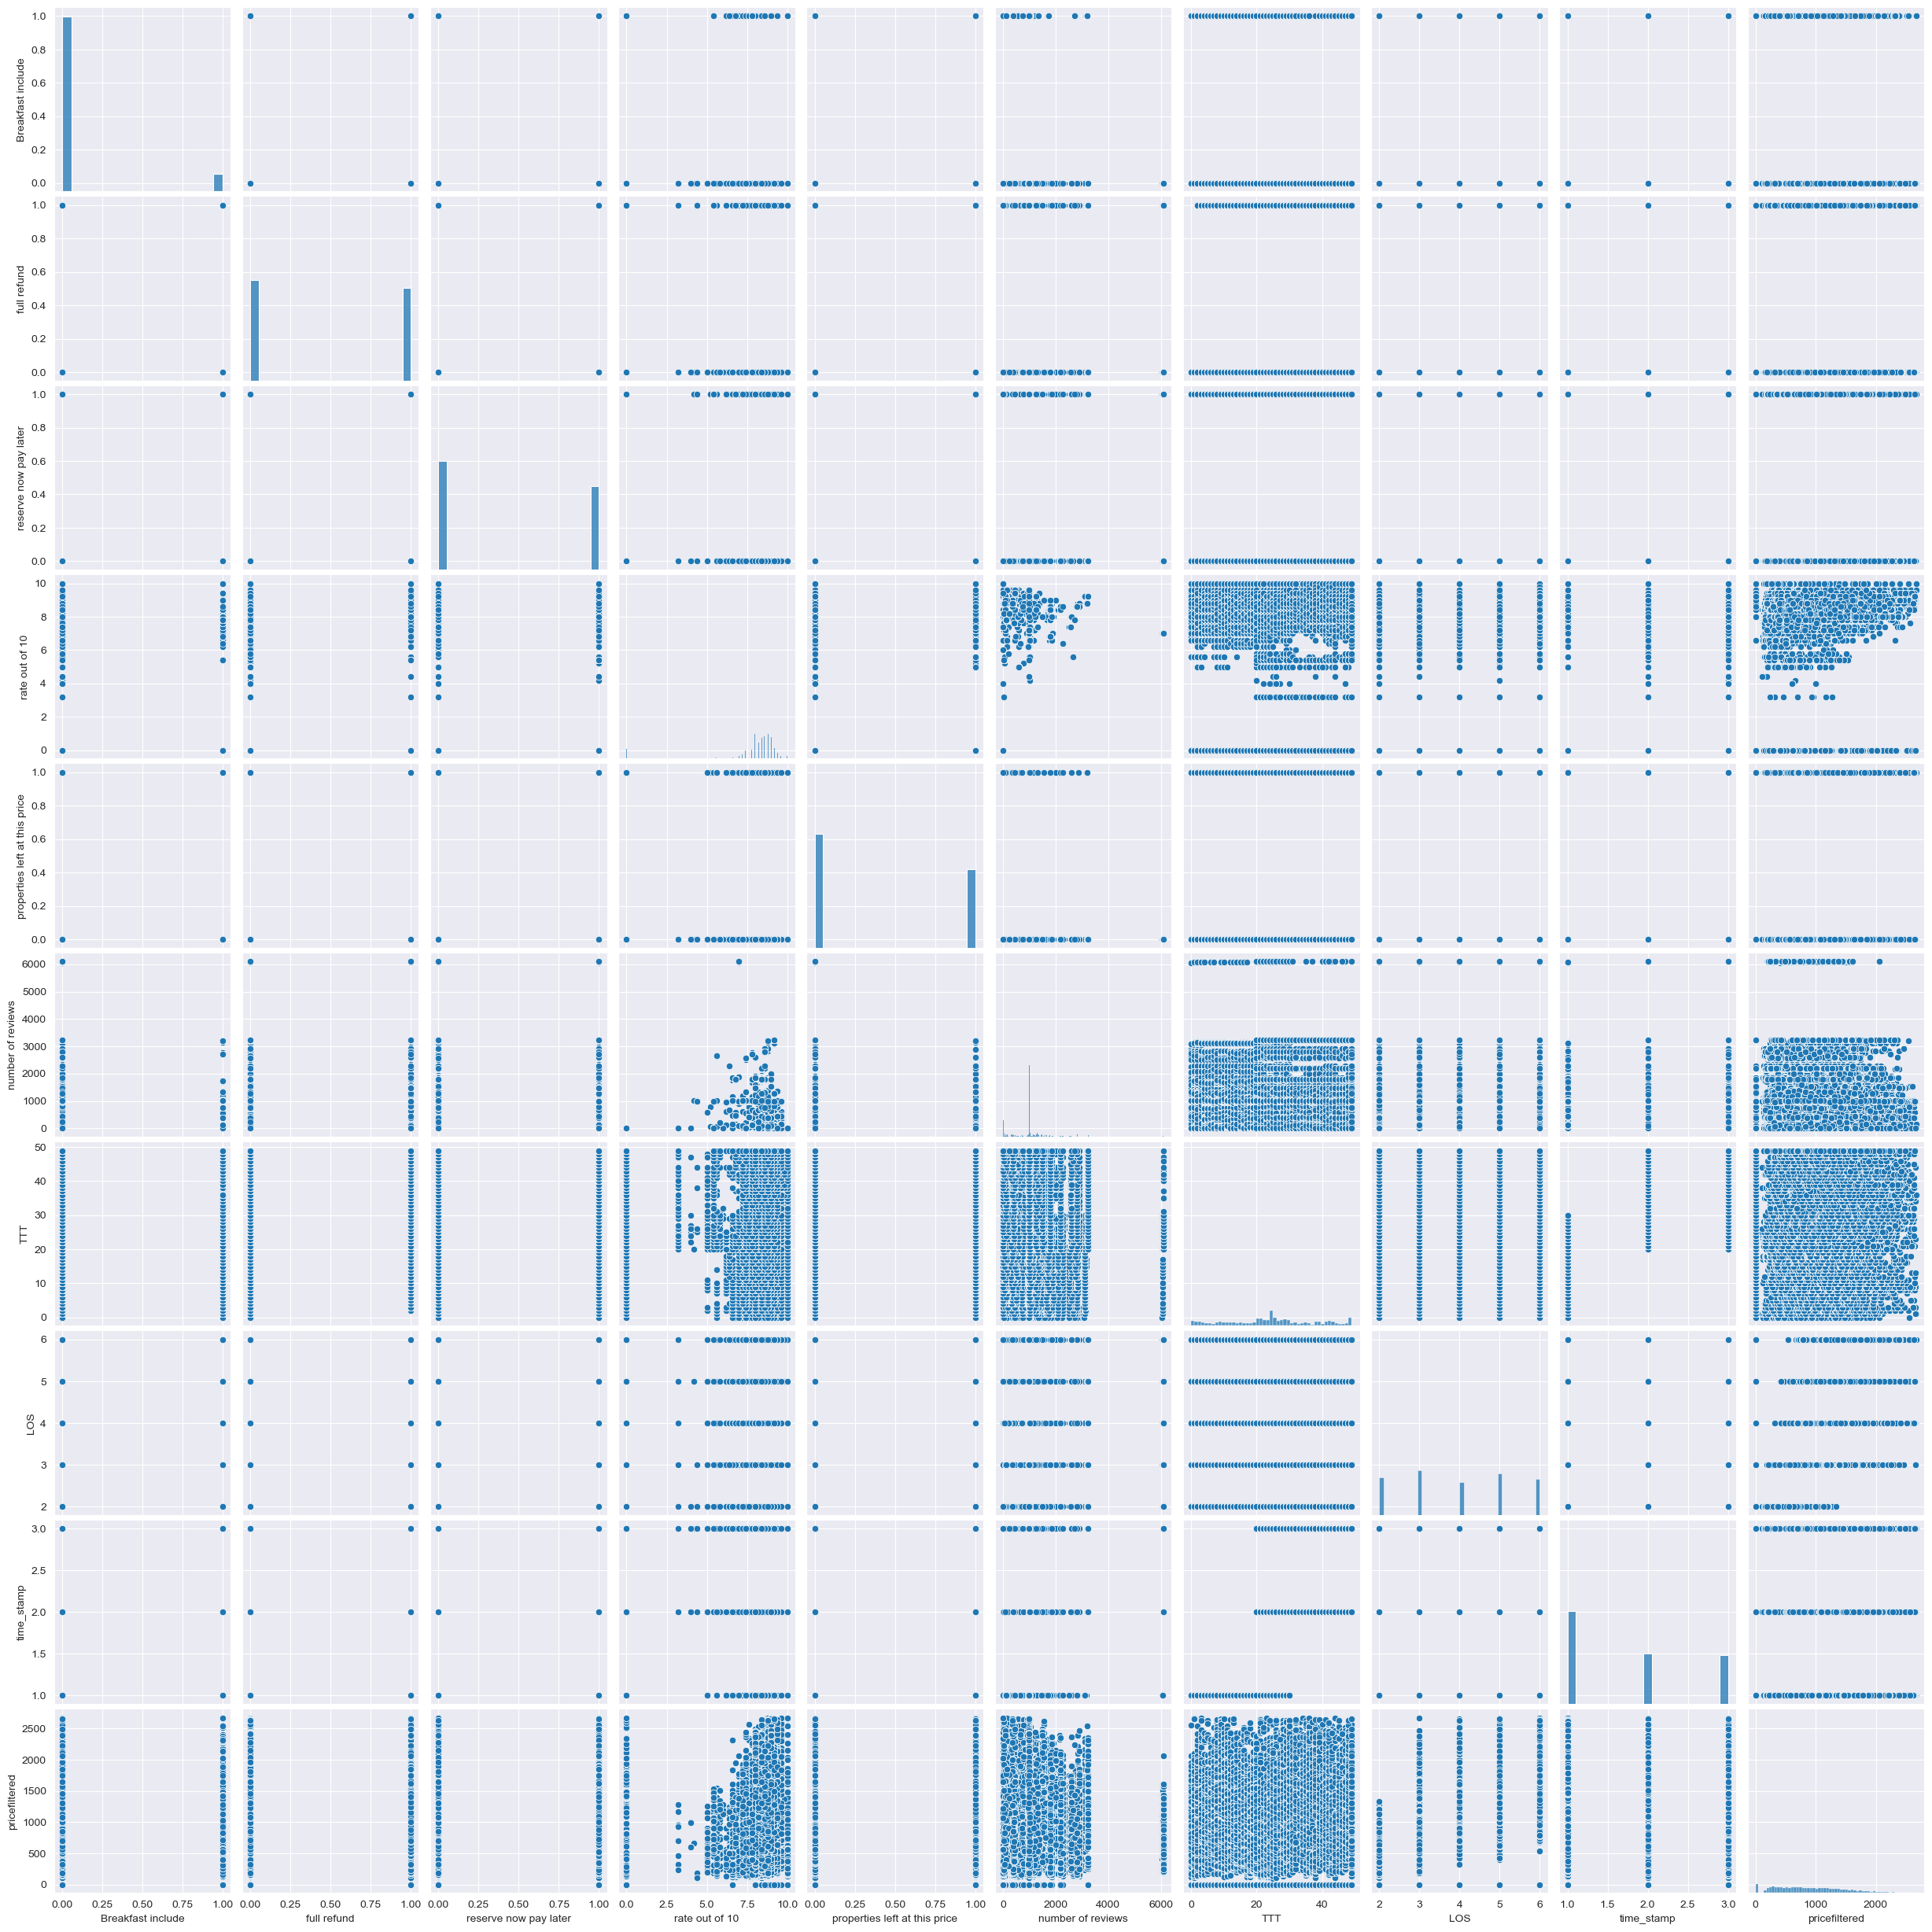

In [31]:
sns.pairplot(data=expidiaDF_filterdPrice, palette=colors[7])

# what we can understand from these graphs
## we can split the graphs that we got to 3 diffrent kinds of graphs

## kind 1:
### 2 values graphs this graph is binomial distribution we can see this kinds of graph where we have colums of data that are either 0 or 1 and they help us to see if the combination of a few of this graph help us in predicting the future price

## kind 2:
###  multiple values graphs this graph are looging more like Geometric distribution graphs beacouse they have several options of values and we can assumed that if they have higher values the price will be higher

In [32]:
expidiaDf.to_csv('expidiaCDFF.csv', index=False)